# Project Sommelier Sciencers

## Goal: 

* Find the key drivers of wine quality.
* Using 3 clustering techniques to construct 4 machine learning models to predict wine quality from the wine quality (red and white) csv's from the Data World dataset.
* Display results using 5 vizzes.

---

## <div class="alert alert-block alert-info"> Imports<div>

In [1]:
# Our Modules
import wrangle_ali as wr
import explore as ex
import stats_conclude as sc
import wine_wrangle as ww
import os

# Numbers
import pandas as pd 
import numpy as np
import scipy.stats as stats

# Vizzes
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting
from sklearn.model_selection import train_test_split

# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Modeling
import auto_model2a as atm
import auto_model3 as atm3
import testing_models as tm

import warnings
warnings.filterwarnings("ignore")

Load in successful... awaiting commands


# <div class="alert alert-block alert-info">  Wrangle 
### Acquire:
* Data acquired from Data.World website
* Each row represents a wine
* Each column represents a feature
  
### Prepare: 
* combined CSV files
* renamed columns
* encoded categoricals
* checked:
    * nulls - none
    * data types
    * quality range
        * 3-9 not 0-10
        * there are no wines rated 0, 1, 2, or 10.
        * mean quality is 6
    * proportion of type
        * white = 75%
        * red = 25%
* outliers are identified and *not* removed
    
### Data Dictionary:
* Explanation of dataset features
 

| Feature | Definition (measurement)|
|:--------|:-----------|
|Fixed Acidity| The fixed amount of tartaric acid. (g/L)|
|Volatile Acidity| A wine's acetic acid; (High Volatility = High Vinegar-like smell). (g/L)|
|Citric Acid| The amount of citric acid; (Raises acidity, Lowers shelf-life). (g/L)|
|Residual Sugar| Leftover sugars after fermentation. (g/L)|
|Chlorides| Increases sodium levels; (Affects color, clarity, flavor, aroma). (g/L)|
|Free Sulfur Dioxide| Related to pH. Determines how much SO2 is available. (Increases shelf-life, decreases palatability). (mg/L)|
|Total Sulfur Dioxide| Summation of free and bound SO2. (Limited to 350ppm: 0-150, low-processed, 150+ highly processed). (mg/L)|
|Density| Between 1.08 and 1.09. (Insight into fermentation process of yeast growth). (g/L)|
|pH| 2.5: more acidic - 4.5: less acidic (range)|
|Sulphates| Added to stop fermentation (Preservative) (g/L)|
|Alcohol| Related to Residual Sugars. By-product of fermentation process (vol%)|
|Quality| Score assigned between 0 and 10; 0=low, 10=best|
|Type| Red or White wine

In [2]:
# Acquire and Prepare
df = wr.wrangle_wine_initial()

Acquire Details
CSV found
CSV found
Combined CSV's into one DF
--------------------------------------------
Prepare Details
Renamed columns for ease of use
Encoded Type column


In [3]:
# Idenitfy Outliers
wr.outliers(df)

Type white is a categorical column.
--------------------------------------------
Outliers Calculated with IQR Ranges, multiplier 1.5
--------------------------------------------
Fixed acidity < = 9.65 and > 4.45
Volatile acidity < = 0.66 and > -0.02
Citric acid < = 0.6 and > 0.04
Residual sugar < = 17.55 and > -7.65
Sodium < = 0.11 and > -0.0
Free so2 shelf life < = 77.0 and > -19.0
Total so2 processed level < = 274.5 and > -41.5
Density < = 1.0 and > 0.99
Ph < = 3.64 and > 2.8
Preservatives < = 0.86 and > 0.18
Alcohol < = 14.0 and > 6.8
Quality < = 7.5 and > 3.5


In [4]:
# Split
train, validate, test = wr.split_data_stratify(df, 'quality')

Prepared DF: (6497, 13)
Train: (3897, 13)
Validate: (1300, 13)
Test: (1300, 13)


<div class="alert alert-block alert-info"> 
    
## Explore
    
### Questions To Answer:
1. Does sodium (chloride) affect quality?
2. Is free sulfur dioxide related to pH?
3. Is alcohol content related to residual sugars?
4. Does alcohol content affect quality of wine?


## <div class="alert alert-block alert-info">  1. Does sodium affect quality?

$H_o$: As the rank of quality increases, the amount of sodium does not change

$H_a$: As the rank of quality increases, the amount of sodium does change

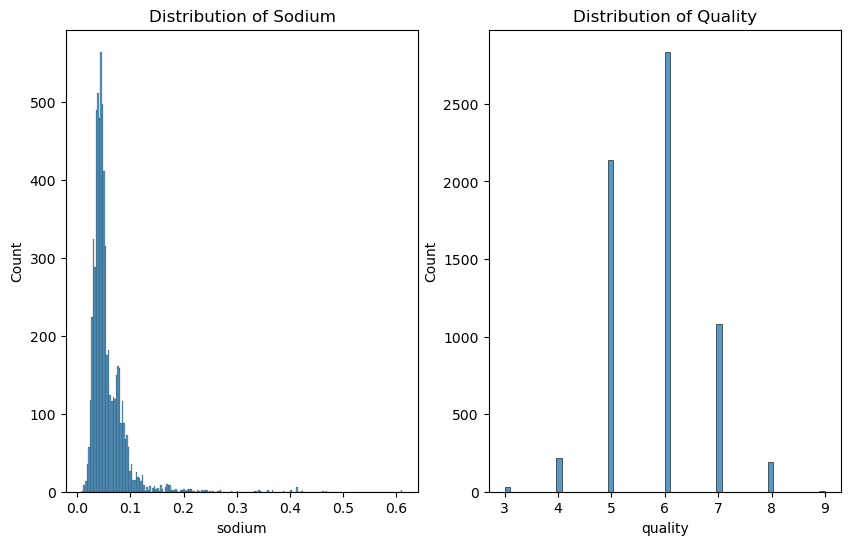

In [5]:
# visualize
ex.sodium_quality_hist(df, 'sodium', 'quality')

In [6]:
# analyze using Spearman's Test for correlation for two continous variables because quality is rank ordered
sc.conclude_spearmanr(train.sodium, train.quality)

Non-Parametric data: Spearman's R test successful...
r (correlation value): -0.3097438037403542
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


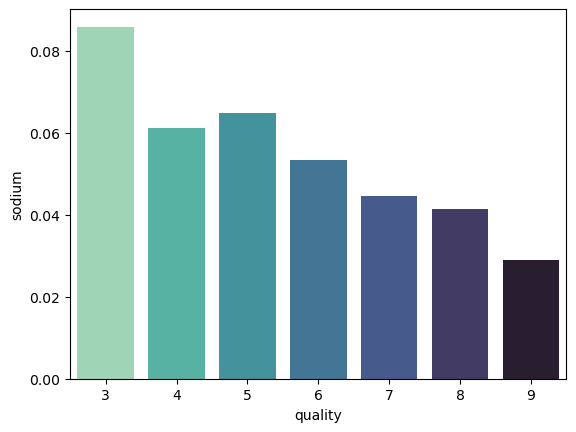

In [7]:
# summarize
ex.summarize_sodium_quality(train, 'sodium', 'quality')
# Yes, negative relationship found (-.31) using Spearman's

### Question 1 Takeaway: lower sodium equals better quality

## <div class="alert alert-block alert-info">  2. Is free sulfur dioxide related to pH?

$H_o$: There is no linear relationship

$H_a$: There is a linear relationship

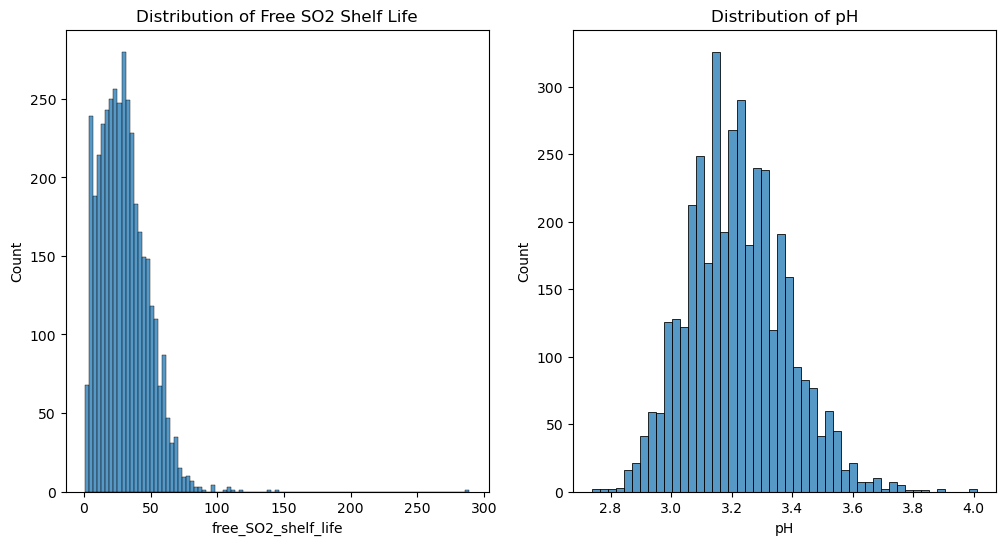

In [8]:
# visualize
ex.free_ph_hist(train, 'free_SO2_shelf_life', 'pH')

In [9]:
# analyze (not normal distribution) proceed with spearman's correlation test
sc.conclude_spearmanr(train.free_SO2_shelf_life, train.pH)

Non-Parametric data: Spearman's R test successful...
r (correlation value): -0.15278404229543982
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


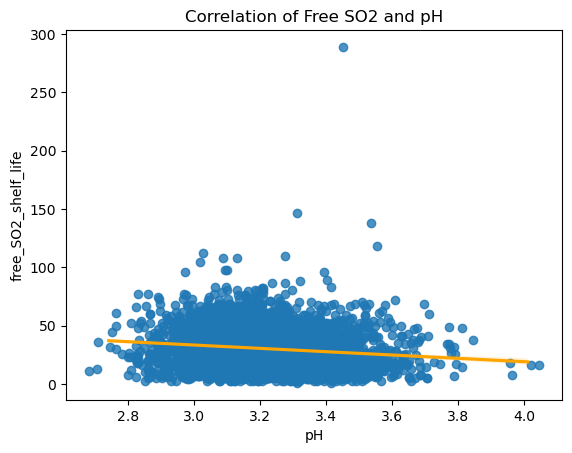

In [10]:
# summarize
# visualize
sns.regplot(data=train, x='pH', y='free_SO2_shelf_life',x_jitter=.1, line_kws={'color':'orange'})
plt.title("Correlation of Free SO2 and pH")
plt.show()

### Question 2 Takeaway:seemingly no significance even though the pvalue is less than alpha.

## <div class="alert alert-block alert-info">  3. Is alcohol content related to residual sugars?

$H_o$: There is no linear relationship

$H_a$: There is a linear relationship

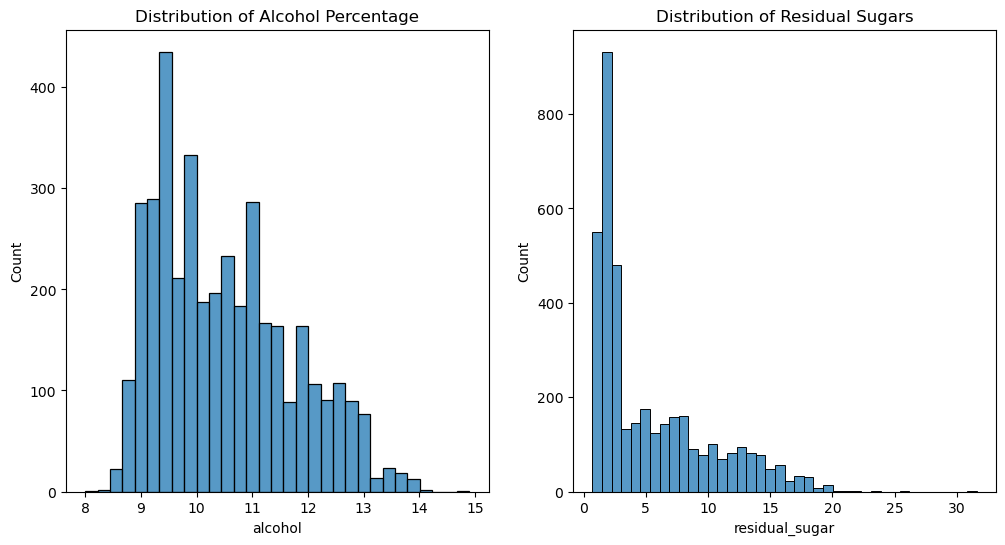

In [11]:
# visualize
ex.alcohol_sugar_hist(train, 'alcohol', 'residual_sugar')

In [12]:
# analyze with spearman's r - assumptions not met for pearson's
sc.conclude_spearmanr(train.alcohol, train.residual_sugar)

Non-Parametric data: Spearman's R test successful...
r (correlation value): -0.31942262018023665
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


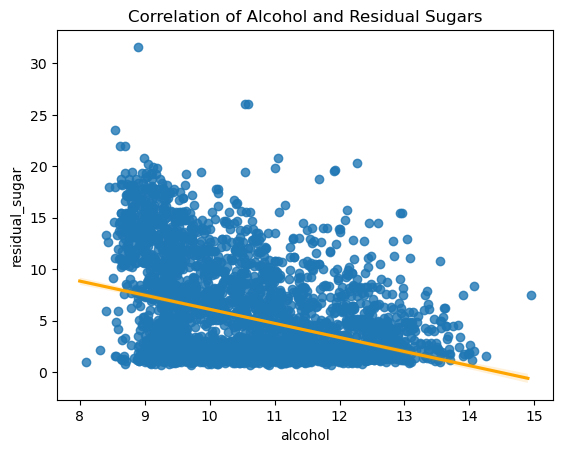

In [13]:
# summarize
# visualize
sns.regplot(data=train, x='alcohol', y='residual_sugar',x_jitter=.1, line_kws={'color':'orange'})
plt.title("Correlation of Alcohol and Residual Sugars")
plt.show()

### Question 3 Takeaway: negative relationship of -0.32 and the higher the sugar, the less alcohol

## <div class="alert alert-block alert-info">  4. Does alcohol content affect quality of wine?

$H_o$: As the alcohol percentage increases, the rank of quality does not change

$H_a$: As the alcohol percentage increases, the rank of quality does change

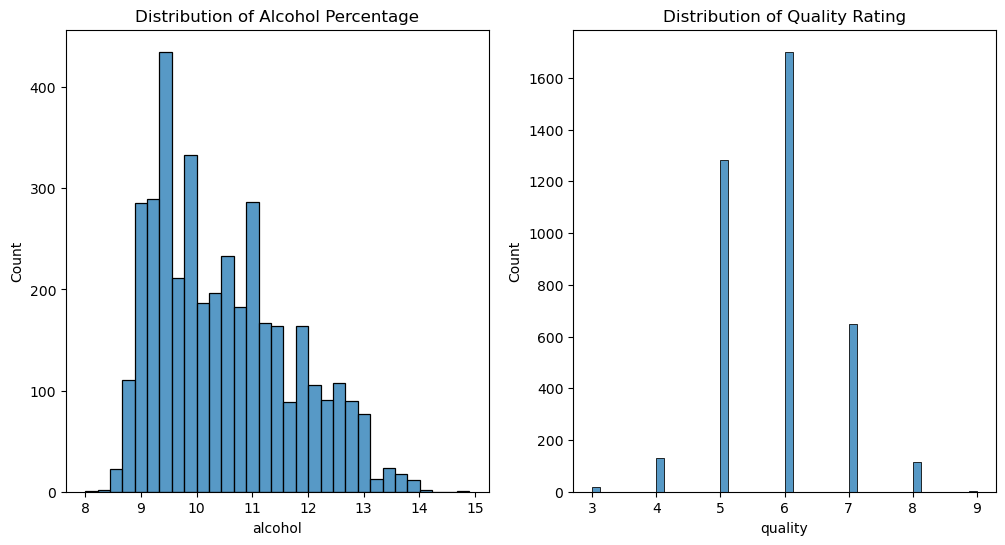

In [14]:
# visualize
ex.alcohol_quality_hist(train, 'alcohol', 'quality')

In [15]:
# analyze (spearman or pearson - they both get .44)
sc.conclude_pearsonr(train.alcohol, train.quality)

Parametric data: Pearson's R test successful...
r (correlation value): 0.43840078077880545
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


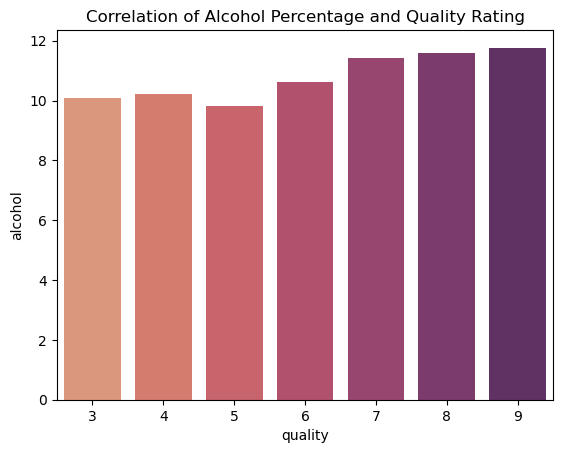

In [16]:
# summarize
ex.summarize_alcohol_quality(train, 'alcohol', 'quality')

### Question 4 Takeaway: the quality goes up with higher alcohol content

<div class="alert alert-block alert-info">  

### Explore Takeaways:

**Target = Quality of Wine**
    
* Answer the following initial questions:
   1. Do chlorides (sodium) affect quality? <br>
       * Yes, negative relationship (-.31)
   2. Is free sulfur dioxide related to pH? <br>
       * Rejected the null, but not significantly enough
   3. Is alcohol content related to residual sugars? <br>
       * Yes, negative relationship (-.32)
   4. Does alcohol content affect quality of wine? <br>
       * Yes, positive relationship (.44)

**Visuals**

* findings for relationship to quality:
    * fixed acidity increases, quality goes down
    * volatile acidity increases, quality goes down - worse than fixed 
    * citric acid has slight positive relationship
    * residual sugar has no relationship - not visually significant
    * chlorides has negative relationship, more chlorides = less quality *super* negative
    * free sulfur dioxide increases quality slightly (look further into type as a 3rd variable)
    * total sulfur dioxide has no signifcance
    * density has negative relationship *significantly* negative
    * pH has no affect on quality
    * preservatives have no affect on quality
    * alcohol is a positive relationship (moderately positive)
    * type has no impact - red is slightly less quality

**Numericals**

* quality range is actually 3-9, not 0-10
    * mean is 5.8
* type has a 75/25 percent proportion
    * white = 75%
    * red = 25%
* pH typical range 0-14
    * wine range 2.72 - 4.01
    * mean 3.2
    * battery acid is a 1, vinegar is 3, tomato juice is a 4


**Feature Engineering**

* total_acidity = fixed + volatile acids
    * contributes directy to quality of wine - negative correlation, higher the acid, lower the quality
 
<div> 

<div class="alert alert-block alert-info"> 

## Preprocessing

* Split into X_train, y_train, X_validate, y_validate, X_test, y_test
* Scale the data using MinMax scaler

In [17]:
# make the cluster df
X_train_cluster = train

# Assign X and y versions of train, validate, and test from all columns except type
X_train = train.drop(columns=['quality', 'type_white'])
y_train = train[['quality']]
X_validate = validate.drop(columns=['quality', 'type_white'])
y_validate = validate[['quality']]
X_test = test.drop(columns=['quality', "type_white"])
y_test = test[['quality']]


In [18]:
# Assign but with clusters (combine volatile acidity and fixed acidity into one column)
train['acid'] = train['volatile_acidity'] + train['fixed_acidity']
train['sweetness'] = train['residual_sugar'] + train['alcohol']
train["feel"] = train['pH'] + train['density']

validate['acid'] = validate['volatile_acidity'] + validate['fixed_acidity']
validate['sweetness'] = validate['residual_sugar'] + validate['alcohol']
validate["feel"] = validate['pH'] + validate['density']

test['acid'] = test['volatile_acidity'] + test['fixed_acidity']
test['sweetness'] = test['residual_sugar'] + test['alcohol']
test["feel"] = test['pH'] + test['density']

#drop the original columns
train = train.drop(columns=['volatile_acidity', 'fixed_acidity', 'residual_sugar', 'alcohol', 'pH', 'density'])
validate = validate.drop(columns=['volatile_acidity', 'fixed_acidity', 'residual_sugar', 'alcohol', 'pH', 'density'])
test = test.drop(columns=['volatile_acidity', 'fixed_acidity', 'residual_sugar', 'alcohol', 'pH', 'density'])

#assign X and y versions of train, validate, and test from all columns
X_train2 = train.drop(columns=['quality', 'type_white'])
y_train2 = train[['quality']]
X_validate2 = validate.drop(columns=['quality', 'type_white'])
y_validate2 = validate[['quality']]
X_test2 = test.drop(columns=['quality', "type_white"])
y_test2 = test[['quality']]

In [19]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol
871,7.7,0.34,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6
2965,5.5,0.34,0.26,2.2,0.021,31.0,119.0,0.98919,3.55,0.49,13.0
2477,6.1,0.27,0.31,1.5,0.035,17.0,83.0,0.99076,3.32,0.44,11.1
673,8.2,0.73,0.21,1.7,0.074,5.0,13.0,0.99680,3.20,0.52,9.5
3115,6.3,0.17,0.32,4.2,0.040,37.0,117.0,0.99182,3.24,0.43,11.3


In [20]:
X_train2.head() 

,citric_acid,sodium,free_SO2_shelf_life,total_SO2_processed_level,preservatives,acid,sweetness,feel
871,0.58,0.039,41.0,151.0,0.49,8.04,19.7,4.05780
2965,0.26,0.021,31.0,119.0,0.49,5.84,15.2,4.53919
2477,0.31,0.035,17.0,83.0,0.44,6.37,12.6,4.31076
673,0.21,0.074,5.0,13.0,0.52,8.93,11.2,4.19680
3115,0.32,0.040,37.0,117.0,0.43,6.47,15.5,4.23182


In [21]:
X_train_cluster.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white,acid,sweetness,feel
871,7.7,0.34,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,5,1,8.04,19.7,4.05780
2965,5.5,0.34,0.26,2.2,0.021,31.0,119.0,0.98919,3.55,0.49,13.0,8,1,5.84,15.2,4.53919
2477,6.1,0.27,0.31,1.5,0.035,17.0,83.0,0.99076,3.32,0.44,11.1,7,1,6.37,12.6,4.31076
673,8.2,0.73,0.21,1.7,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,0,8.93,11.2,4.19680
3115,6.3,0.17,0.32,4.2,0.040,37.0,117.0,0.99182,3.24,0.43,11.3,6,1,6.47,15.5,4.23182


In [22]:
# Scale
X_train_scaled, X_validate_scaled, X_test_scaled = ww.scale_data(X_train, X_validate, X_test)
X_train_scaled2, X_validate_scaled2, X_test_scaled2 = ww.scale_data(X_train2, X_validate2, X_test2)

<div class="alert alert-block alert-info"> 
    
# Clustering

**Feature sets to send in:**

* fixed, volatile, citric acid
* residual sugar, alcohol, type_white
* pH, preservatives, density

In [23]:
# scale the cluster df
X_train_cluster_scaled = wr.scaler_cluster(X_train_cluster)

# drop the clustered columns
X_train_cluster_scaled = X_train_cluster_scaled.drop(columns={'acid', 'sweetness', 'feel'})

In [24]:
X_train_cluster_scaled.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white
871,0.322314,0.173333,0.58,0.33657,0.049834,0.138889,0.334101,0.460509,0.251969,0.146893,0.086957,0.333333,1.0


### Feature Set 1:

* use X_train_cluster & X_train_cluster_scaled
* clusters = 2
* fixed, volatile, citric acid

In [25]:
# make and fit the kmeans thing
kmeans = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans.fit(X_train_cluster_scaled[['fixed_acidity', 'volatile_acidity','citric_acid']])

# use on X
pred_set_1 = kmeans.predict(X_train_cluster_scaled[['fixed_acidity', 'volatile_acidity','citric_acid']])

In [26]:
# add cluster prediction back onto X_train_cluster and X_train_cluster_scaled dataframe
X_train_cluster['cluster_set_1'] = pred_set_1
X_train_cluster_scaled['cluster_set_1'] = pred_set_1

# rename clusters using map
X_train_cluster['cluster_set_1'] = X_train_cluster.cluster_set_1.map({
    0:'High Citric Acid - Low Volatile Acidity',
    1:'Low Citric Acid - High Volatile Acidity'})
X_train_cluster_scaled['cluster_set_1'] = X_train_cluster_scaled.cluster_set_1.map({
    0:'High Citric Acid - Low Volatile Acidity',
    1:'Low Citric Acid - High Volatile Acidity'})

In [27]:
# visualize means first 
X_train_cluster.groupby('quality')['fixed_acidity', 'volatile_acidity','citric_acid'].mean()

,fixed_acidity,volatile_acidity,citric_acid
quality,,,
3,8.155556,0.593056,0.281111
4,7.324615,0.469808,0.283385
5,7.377886,0.391720,0.306919
6,7.132069,0.313407,0.322816
7,7.115301,0.288547,0.332751
8,6.770690,0.280172,0.324483
9,7.700000,0.290000,0.366667


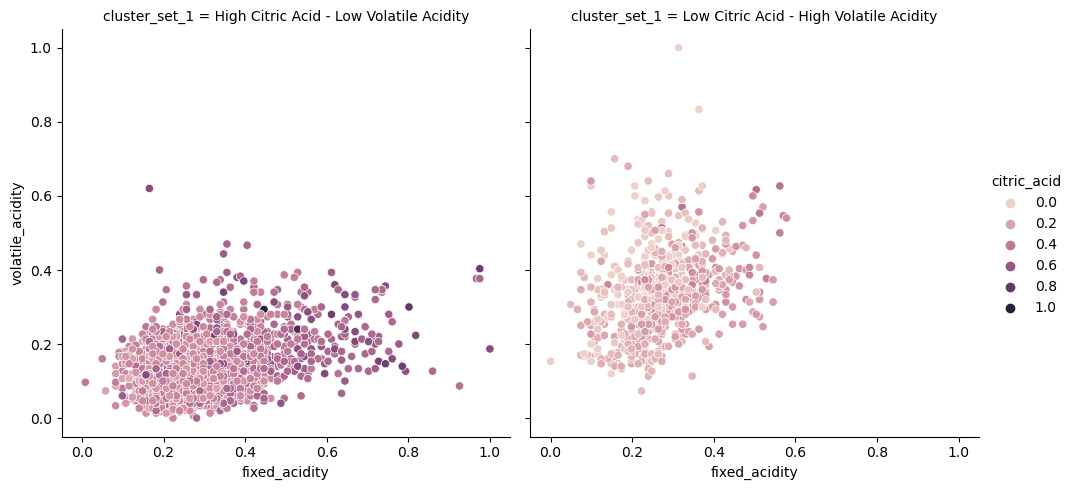

In [28]:
# separate to see each cluster - hue is citric acid
sns.relplot(data=X_train_cluster_scaled, x='fixed_acidity', y='volatile_acidity', hue='citric_acid', col='cluster_set_1', col_wrap=2)
plt.show()

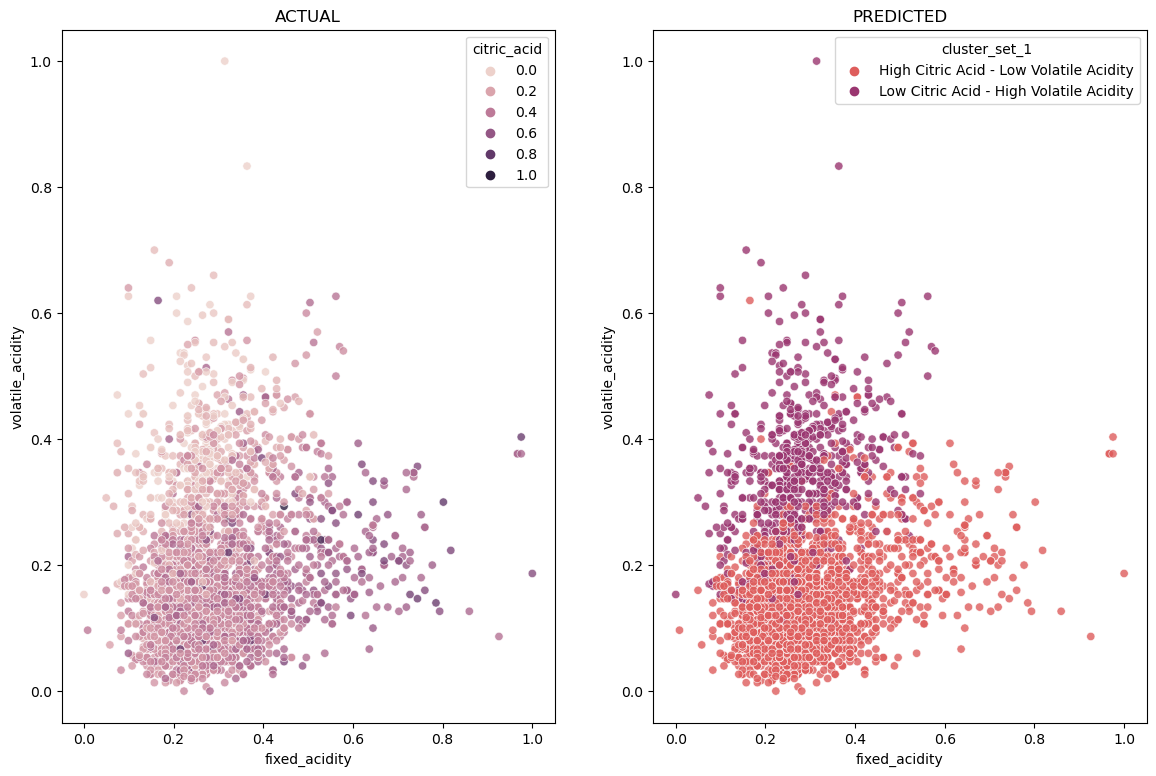

In [29]:
# viz to see cluster results against actual graph 
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=X_train_cluster_scaled, x='fixed_acidity', y='volatile_acidity', hue='citric_acid', alpha=.8)
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train_cluster_scaled, x='fixed_acidity', y='volatile_acidity', hue='cluster_set_1', palette='flare', alpha=.8)
plt.title('PREDICTED')
plt.show()

In [30]:
# explore cluster_set_1 with the target variable



### Feature Set 1 Takeaways:

Features sent in:
* clusters = 2
* fixed, volatile, citric acid

Means of the centroids:
* between quality rating 5 and 6, the volatile acidity mean drops from 39 to 31 and continues it's negative trend
* quality level 8 has the lowest fixed acidity while quality level 9 (highest) has the second highest mean
* citric acid means have an inverse relationship to volatile acidity

Visuals:
* Clustering looks to be fairly weak. There is a relationship between citric acid and volatile acid but I don't believe that amounts to any significant clusters.
* Volatile Acidity results from the degradation of citric acid. As citric acid degrades, volatile acidity goes up.


### Feature Set 2:

* use X_train_cluster & X_train_cluster_scaled
* clusters = 2
* residual sugar, alcohol, density

In [31]:
# make and fit the kmeans thing
kmeans = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans.fit(X_train_cluster_scaled[['residual_sugar', 'alcohol','density']])

# use on X
pred_set_2 = kmeans.predict(X_train_cluster_scaled[['residual_sugar', 'alcohol','density']])

In [32]:
# add cluster prediction back onto X_train_cluster and X_train_cluster_scaled dataframe
X_train_cluster['cluster_set_2'] = pred_set_2
X_train_cluster_scaled['cluster_set_2'] = pred_set_2

# rename clusters using map
X_train_cluster['cluster_set_2'] = X_train_cluster.cluster_set_2.map({
    0:'White Wine',
    1:'Red Wine'})
X_train_cluster_scaled['cluster_set_2'] = X_train_cluster_scaled.cluster_set_2.map({
    0:'White Wine',
    1:'Red Wine'})

In [33]:
# visualize first numerically
X_train_cluster.groupby('quality')['residual_sugar', 'alcohol','density'].mean()

,residual_sugar,alcohol,density
quality,,,
3,4.333333,10.086111,0.996332
4,3.971538,10.227308,0.994870
5,5.771724,9.832241,0.995896
6,5.512816,10.621830,0.994432
7,4.790340,11.407584,0.993065
8,5.161207,11.593966,0.992533
9,4.733333,11.766667,0.992400


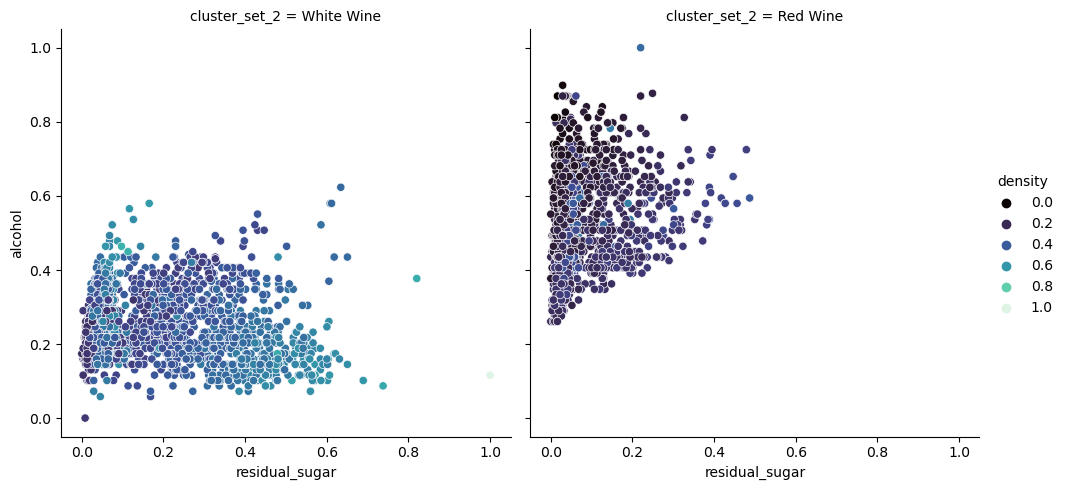

In [34]:
# separate to see each cluster - hue is density
sns.relplot(data=X_train_cluster_scaled, x='residual_sugar', y='alcohol', hue='density', col='cluster_set_2', col_wrap=2, palette='mako')
plt.show()

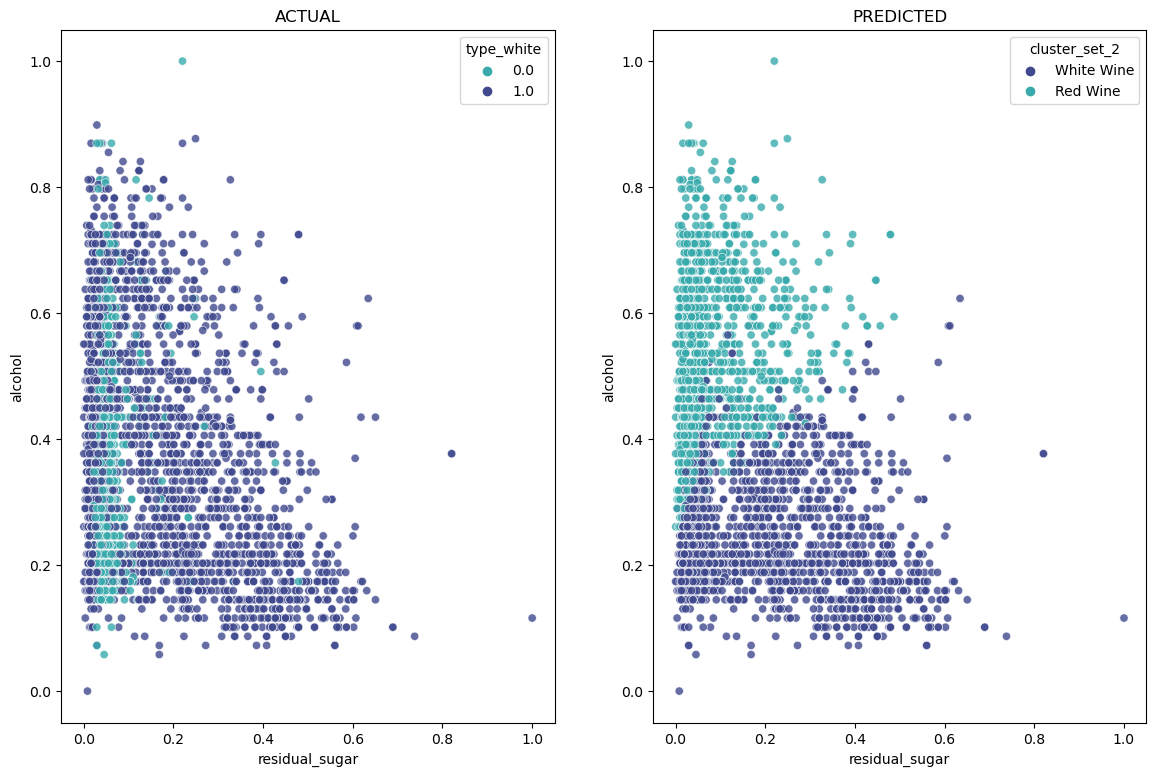

In [35]:
# viz to see cluster results against actual graph
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=X_train_cluster_scaled, x='residual_sugar', y='alcohol', hue='type_white', palette='mako_r', alpha=.8)
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train_cluster_scaled, x='residual_sugar', y='alcohol', hue='cluster_set_2', palette='mako', alpha=.8)
plt.title('PREDICTED')
plt.show()

In [36]:
# explore cluster_set_2 with the target variable


### Feature Set 2 Takeaways:

Features sent in:
* clusters = 2
* residual sugar, alcohol, type_white

Means of the centroids:
* as quality increases, alcohol content increases
* quality of 9 has a mean of 1 for type_white indicating ALL the wine that is that quality is a white wine

Visuals:
* Clustering successful for this relationship
* it looks like after ~2.5 residual sugar and alcohol relationship changes - that makes sense becuase red wine is lower in sugars than white wine, which is what is displayed visually
* white wine results in a much wider range of residual sugars
* red and white share the same range of alcohol levels


### Feature Set 3:

* use X_train_cluster and X_train_cluster_scaled
* clusters = 2
* pH, preservatives, density

In [37]:
# make and fit the kmeans thing
kmeans = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans.fit(X_train_cluster_scaled[['pH', 'preservatives','density']])

# use on X
pred_set_3 = kmeans.predict(X_train_cluster_scaled[['pH', 'preservatives','density']])

In [38]:
# add cluster prediction back onto X_train_cluster and X_train_cluster_scaled dataframe
X_train_cluster['cluster_set_3'] = pred_set_3
X_train_cluster_scaled['cluster_set_3'] = pred_set_3

# rename clusters using map
X_train_cluster['cluster_set_3'] = X_train_cluster.cluster_set_3.map({
    0:'Lower Preservatives - Lower Density',
    1:'Higher Preservatives - Higher Density'})
X_train_cluster_scaled['cluster_set_3'] = X_train_cluster_scaled.cluster_set_3.map({
    0:'Lower Preservatives - Lower Density',
    1:'Higher Preservatives - Higher Density'})

In [39]:
# visualize first numerically
X_train_cluster.groupby('quality')['pH', 'preservatives','density'].mean()

,pH,preservatives,density
quality,,,
3,3.277222,0.534444,0.996332
4,3.231462,0.506308,0.994870
5,3.212956,0.529337,0.995896
6,3.216955,0.529377,0.994432
7,3.229134,0.544080,0.993065
8,3.240086,0.523103,0.992533
9,3.296667,0.516667,0.992400


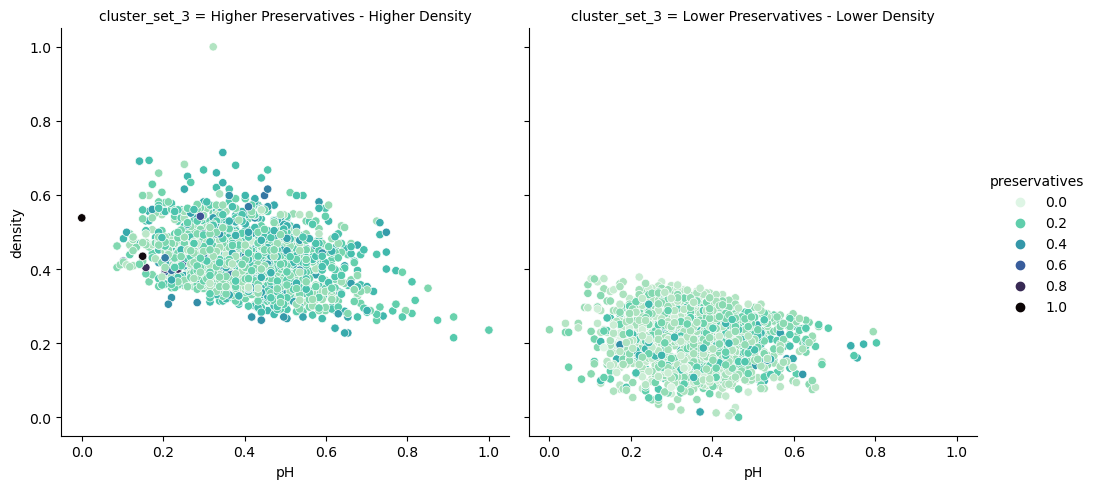

In [40]:
# separate to see each cluster - hue is preservatives
sns.relplot(data=X_train_cluster_scaled, y='density', x='pH', hue='preservatives', col='cluster_set_3',palette='mako_r', col_wrap=2)
plt.show()

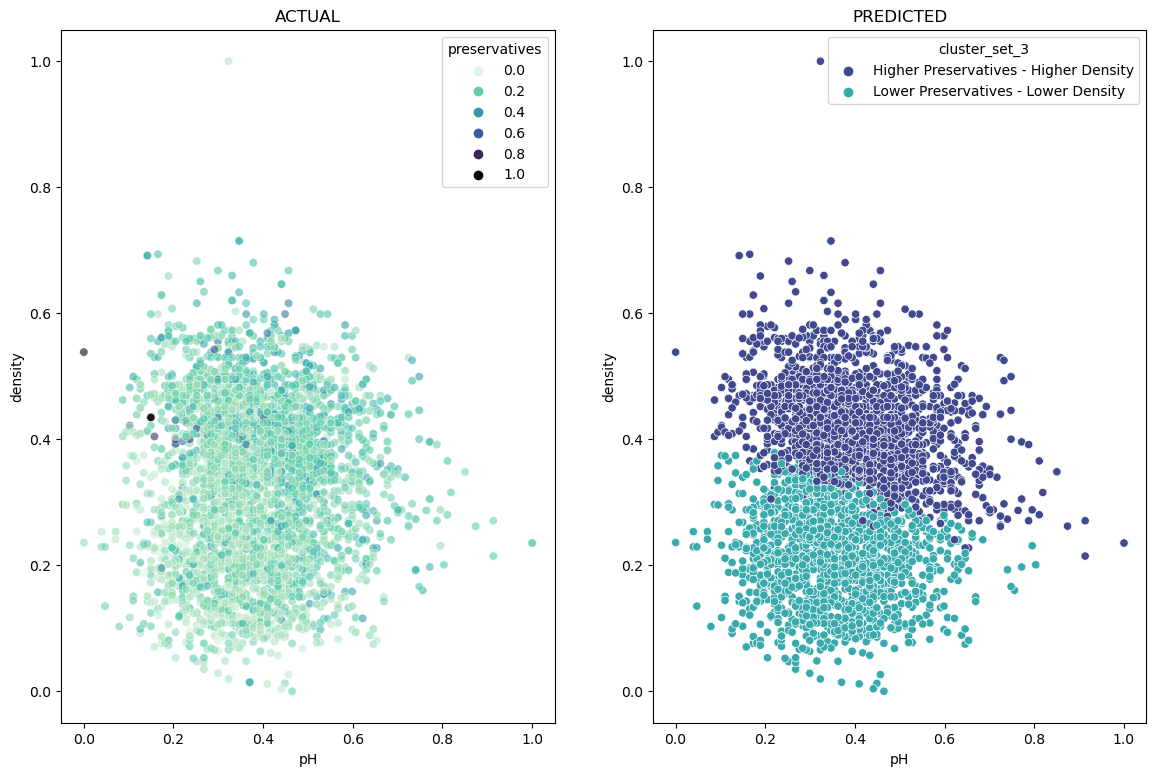

In [41]:
# graphically
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=X_train_cluster_scaled, y='density', x='pH', hue='preservatives', palette='mako_r', alpha=.6)
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train_cluster_scaled, y='density', x='pH', hue='cluster_set_3', palette='mako')
plt.title('PREDICTED')
plt.show()

In [42]:
# explore cluster_set_3 with the target variable


### Feature Set 3 Takeaways:

Features sent in:
* clusters = 2
* pH, preservatives, density

Means of the centroids:
* resulted in zero significance

Visuals:
* clustering failed, there are no clusters to be made
* *slight* relationship noted between density and preservatives, as density goes up, so do preservatives.


<div class="alert alert-block alert-info"> 

# Clustering Takeaway:

* as quality increases, alcohol content increases
* slight relationship noted between density and preservatives, as density goes up, so do preservatives.
* white wine results in a much wider range of residual sugars
* Volatile Acidity results from the degradation of citric acid. As citric acid degrades, volatile acidity goes up.

<div class="alert alert-block alert-info"> 
    
# Modeling Overview
        
**Features Used and General Performance**   
* All features were used except for wine type due to very low correlation with quality
* Classification models out performed regression models

 **Metrics:**
* Accuracy and Precision    
---

**Models Used:**

Classification: 
* K-Nearest Neighbors
* Random Forest
* Logistic Regression
#### Baseline: 44%  
    

  

#### K-Nearest Neighbors

In [43]:
#runs the automatic knn clasaification model function
atm.auto_knn_scores(X_train, y_train, X_validate, y_validate)

    k  train_accuracy  validate_accuracy     delta
0   3        0.726456           0.460000  0.266456
1   5        0.635104           0.463846  0.171258
2   7        0.602002           0.463077  0.138925
3   8        0.581730           0.462308  0.119422
4  12        0.554786           0.475385  0.079401
5  18        0.534001           0.473077  0.060924


#### K-Nearest Neighbors with Clusters

In [44]:
#runs the automatic knn clasaification model function with clusters
atm.auto_knn_scores(X_train2, y_train2, X_validate2, y_validate2)

    k  train_accuracy  validate_accuracy     delta
0   3        0.719015           0.448462  0.270553
1   5        0.615602           0.457692  0.157909
2   7        0.580190           0.447692  0.132498
3   8        0.573518           0.443846  0.129672
4  12        0.535540           0.452308  0.083232
5  18        0.522197           0.462308  0.059889


#### Random Forest

In [45]:
#runs the automatic random forest model 
atm.auto_random_forest_scores(X_train, y_train, X_validate, y_validate)

   max_depth  train_accuracy  validate_accuracy     delta
6         20        1.000000           0.660769  0.339231
4         15        0.993328           0.657692  0.335636
5         18        1.000000           0.666154  0.333846
3         13        0.960996           0.664615  0.296380
2         10        0.844752           0.631538  0.213214
1          8        0.718758           0.591538  0.127220
0          5        0.584552           0.543846  0.040706


#### Random Forest with Clusters

In [46]:
#runs the automatic random forest model function with clusters 
atm.auto_random_forest_scores(X_train2, y_train2, X_validate2, y_validate2)

   max_depth  train_accuracy  validate_accuracy     delta
6         20        1.000000           0.637692  0.362308
5         18        1.000000           0.639231  0.360769
4         15        0.988453           0.636923  0.351530
3         13        0.957147           0.626154  0.330993
2         10        0.828586           0.602308  0.226278
1          8        0.702848           0.560000  0.142848
0          5        0.567103           0.513077  0.054026


#### Logistic Regression

In [47]:
#runs the automatic logistic regression model
atm.auto_lo_regress_scores(X_train, y_train, X_validate, y_validate)

   max_depth  train_accuracy  validate_accuracy     delta
0          5        0.475494           0.472308  0.003186
1          8        0.475494           0.472308  0.003186
2         10        0.475494           0.472308  0.003186
3         13        0.475494           0.472308  0.003186
4         15        0.475494           0.472308  0.003186
5         18        0.475494           0.472308  0.003186
6         20        0.475494           0.472308  0.003186


#### Logistic Regression with Clusters

In [48]:
#runs the automatic logistic regression model with clusters
atm.auto_lo_regress_scores(X_train2, y_train2, X_validate2, y_validate2)

   max_depth  train_accuracy  validate_accuracy     delta
0          5        0.453939           0.464615 -0.010676
1          8        0.453939           0.464615 -0.010676
2         10        0.453939           0.464615 -0.010676
3         13        0.453939           0.464615 -0.010676
4         15        0.453939           0.464615 -0.010676
5         18        0.453939           0.464615 -0.010676
6         20        0.453939           0.464615 -0.010676


#### The best tested

In [49]:
#runs the function to test the best model on the test data
atm.auto_random_trees_test(X_test, y_test, X_train, y_train)


------------------------ Test Model with depth of 20 Scores------------------------------
             3          4           5           6           7          8    9  \
precision  0.0   0.800000    0.666667    0.609078    0.677632   1.000000  0.0   
recall     0.0   0.093023    0.700935    0.733686    0.476852   0.256410  0.0   
f1-score   0.0   0.166667    0.683371    0.665600    0.559783   0.408163  0.0   
support    6.0  43.000000  428.000000  567.000000  216.000000  39.000000  1.0   

           accuracy    macro avg  weighted avg  
precision  0.640769     0.536197      0.654191  
recall     0.640769     0.322987      0.640769  
f1-score   0.640769     0.354798      0.626059  
support    0.640769  1300.000000   1300.000000  
------------ Metrics ----------
Accuracy is 0.6407692307692308


#### Best Tested With Clusters


In [50]:
#runs the function to test the best model on the test data with clusters
atm.auto_random_trees_test(X_test2, y_test2, X_train2, y_train2)


------------------------ Test Model with depth of 20 Scores------------------------------
             3          4           5           6           7          8    9  \
precision  0.0   0.714286    0.623126    0.587977    0.714286   0.909091  0.0   
recall     0.0   0.116279    0.679907    0.707231    0.439815   0.256410  0.0   
f1-score   0.0   0.200000    0.650279    0.642114    0.544413   0.400000  0.0   
support    6.0  43.000000  428.000000  567.000000  216.000000  39.000000  1.0   

           accuracy    macro avg  weighted avg  
precision  0.616923     0.506966      0.631181  
recall     0.616923     0.314235      0.616923  
f1-score   0.616923     0.348115      0.603224  
support    0.616923  1300.000000   1300.000000  
------------ Metrics ----------
Accuracy is 0.6169230769230769


## Classification Performance
### Out of classifcation models random forest at a depth of 20 with no clusters had the highest accuracy at 64% (beatig the baseline of 44%) with relatively high precision
### Precision scores for the model:
    - Quality 3 : 0%
    - Quality 4 : 80%
    - Quality 5 : 67%
    - Quality 6 : 62%
    - Quality 7 : 68%
    - Quality 8 : 100%
    - Quality 9 : 0%

----    

## **Regression Models Used:**

* Ordinary Least Squares
* LASSO + LARS
* Polynomial Regression
* Generalized Linear Model 

In [51]:
#splits data without stratify
train, validate, test = ww.split_function_cont_target(df)

In [52]:
#sets up X and y for train, validate, and test
X_train = train.drop(columns=['quality', 'type_white'])
y_train = train[['quality']]
X_validate = validate.drop(columns=['quality', 'type_white'])
y_validate = validate[['quality']]
X_test = test.drop(columns=['quality', "type_white"])
y_test = test[['quality']]

In [53]:
# Assign but with clusters
# combine volatile acidity and fixed acidity into one column
train['acid'] = train['volatile_acidity'] + train['fixed_acidity']
train['sweetness'] = train['residual_sugar'] + train['alcohol']
train["feel"] = train['pH'] + train['density']

validate['acid'] = validate['volatile_acidity'] + validate['fixed_acidity']
validate['sweetness'] = validate['residual_sugar'] + validate['alcohol']
validate["feel"] = validate['pH'] + validate['density']

test['acid'] = test['volatile_acidity'] + test['fixed_acidity']
test['sweetness'] = test['residual_sugar'] + test['alcohol']
test["feel"] = test['pH'] + test['density']

#drop the original columns
train = train.drop(columns=['volatile_acidity', 'fixed_acidity', 'residual_sugar', 'alcohol', 'pH', 'density'])
validate = validate.drop(columns=['volatile_acidity', 'fixed_acidity', 'residual_sugar', 'alcohol', 'pH', 'density'])
test = test.drop(columns=['volatile_acidity', 'fixed_acidity', 'residual_sugar', 'alcohol', 'pH', 'density'])
#assign X and y versions of train, validate, and test from all columns
X_train2 = train.drop(columns=['quality', 'type_white'])
y_train2 = train[['quality']]
X_validate2 = validate.drop(columns=['quality', 'type_white'])
y_validate2 = validate[['quality']]
X_test2 = test.drop(columns=['quality', "type_white"])
y_test2 = test[['quality']]

In [54]:
#re-scales the data
X_train_scaled, X_validate_scaled, X_test_scaled = ww.scale_data(X_train, X_validate, X_test)

X_train_scaled2, X_validate_scaled2, X_test_scaled2 = ww.scale_data(X_train2, X_validate2, X_test2)


#### All Regression Models

In [55]:
# runs all regression models
atm3.auto_regress( y_train, train, X_train_scaled, X_validate_scaled, y_validate, X_test_scaled)

           model      RMSE       r^2
0  mean_baseline  0.866896  0.000000
1          ols_1  0.792936  0.210049
2          ols_2  0.746230  0.300368
3           lars  0.892248 -0.000220
4           poly  0.740865  0.310391
5            glm  0.746311  0.300216


The best model is the poly model



#### All Regression Models with Clusters

In [56]:
#runs all regression models with clusters
atm3.auto_regress( y_train2, train, X_train_scaled2, X_validate_scaled2, y_validate2, X_test_scaled2)


           model      RMSE       r^2
0  mean_baseline  0.866896  0.000000
1          ols_1  0.873858  0.040586
2          ols_2  0.832298  0.129673
3           lars  0.892248 -0.000220
4           poly  0.814732  0.166023
5            glm  0.831084  0.132211


The best model is the poly model



## Regression Performance
### Out of the regression models Polynomial Regression without clusters peformed the best beating the RMSE baseline of .87 with an RMSE of .72 at r^2 rate of .33

['Polynomial Model Test', 0.7167068207201659, 0.3255248940388825]


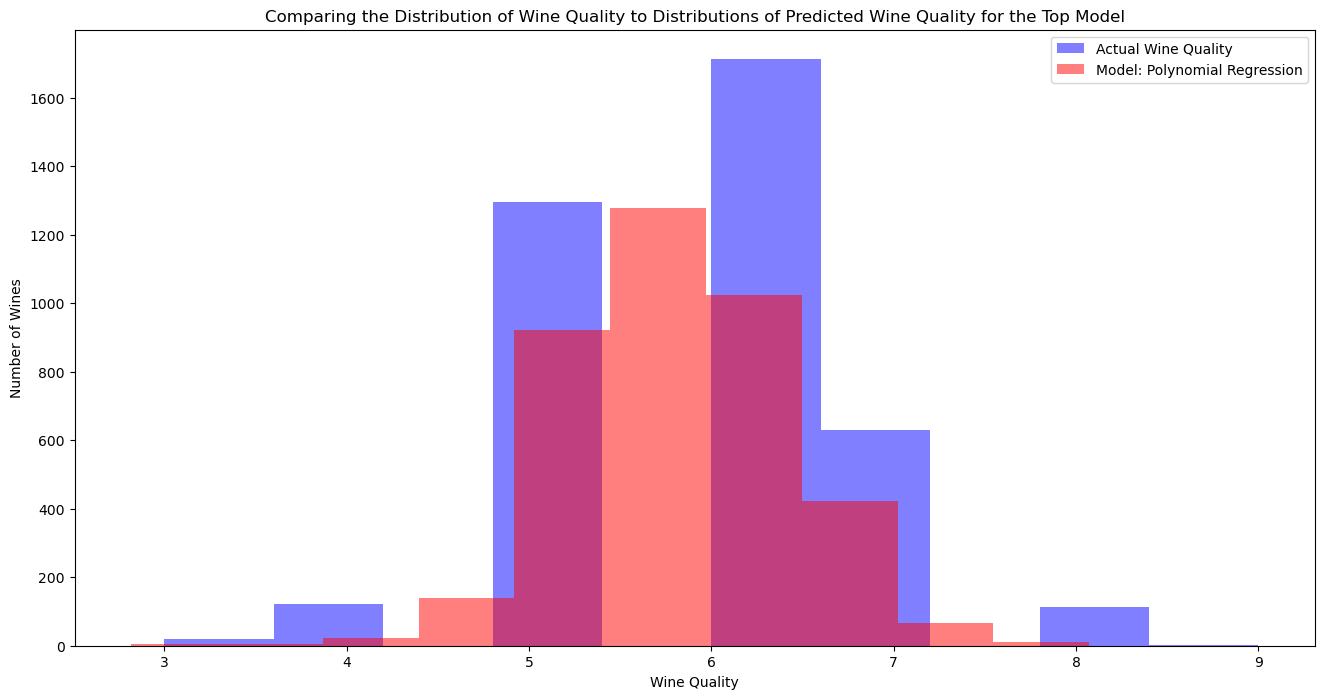

In [57]:
# Charts the GLM model performance showing predicted vs actual
tm.test_poly_model(y_train, y_test, X_train_scaled,X_test_scaled)

['Polynomial Model Test', 0.7777159317535289, 0.205809219237023]


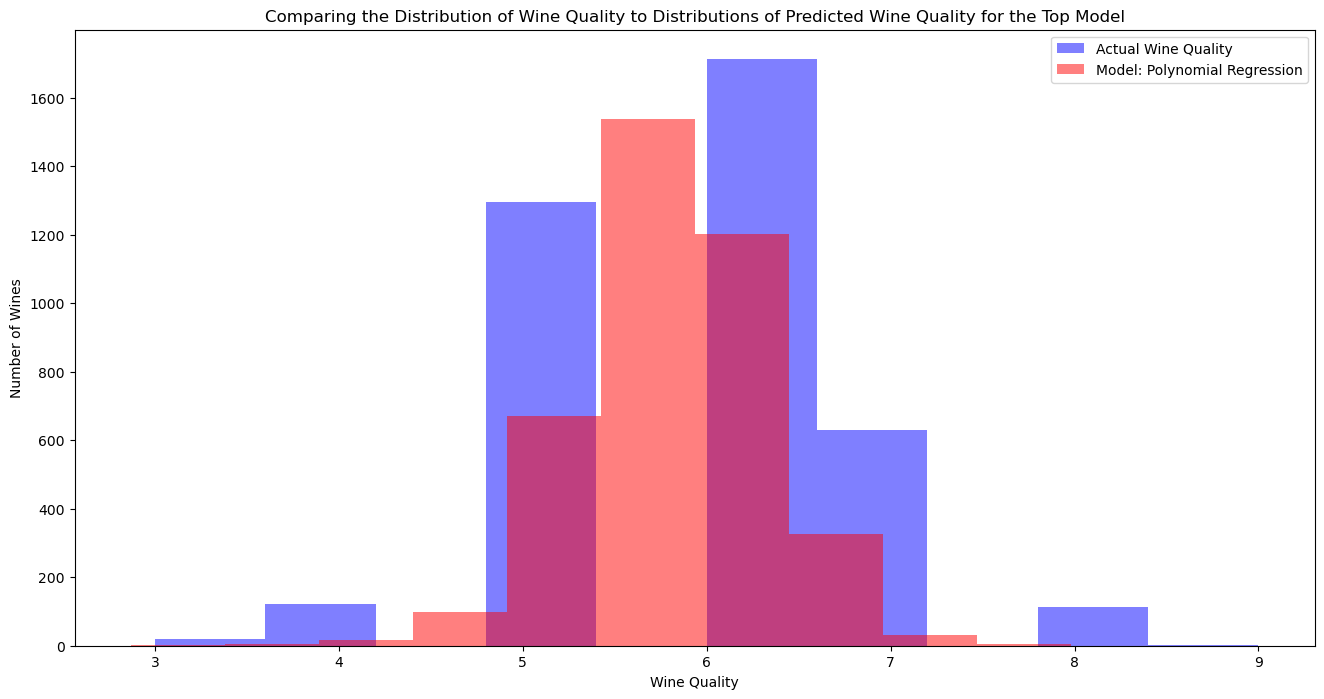

In [58]:
# Charts the GLM model performance showing predicted vs actual with clusters
tm.test_poly_model(y_train2, y_test2, X_train_scaled2,X_test_scaled2)

<div class="alert alert-block alert-info">
    
# Project Conclusion
    

### Explore:
    
* Acidity negatively affects the quality of wine
  
* Alcohol positively affects the quality of wine
  
* White wine results in a much wider range of residual sugars
  
* Quality range is actually 3-9, not 0-10
    * Mean is 5.8
    
* Type has a 75/25 percent proportion
    * white = 75%
    * red = 25%
    
* pH typical range 0-14
    * wine range 2.72 - 4.01
        * battery acid is a 1, vinegar is 3, tomato juice is a 4
    
### Modeling:

* The random forest performed well at predicting wines in the quality ranges of 4-7 even hitting over 80% true positive rates at 4 and 7. The model preformed worse at the end ranges mostly due to the fact that in those ranges there are limited number of wines. 

* While the Polynomial Model beat baseline with a RMSE of .72 this means that predictions will still be off by nearly an entire quality level. This is refelcted in the graph by showing how that most of the predictions are clumped in the middle. 

* Classification modeling (random forest) is comparativly better than any regression model for predicting specific catagories sprend across a greater range of predicted and actual datapoints.

    
### Recommendations and Next Steps:
    
* For future researchers: This data set consisted of only variants of the Portuguese vinho verde and their associated grape types, in order to more fully explore and predict wine quality data on more grape types must be collected.
    
* For the data engineers: Either split the dataset into white and red and create separate models or gather more data on red types of vinho verde to balance the dataframe and provide additional insights.

* For the data scientsists: Remove outlier and engineer "acid" and "feel" features using appropriate columns. 

* For the business: We do not recommend putting the regression models into production. However, the random forest model shows promise and may be suitable for production.